In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Engineering

In [7]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [9]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [11]:
df = df.rename(columns = {'yes':'Smoker'})

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Exploratory Analysis

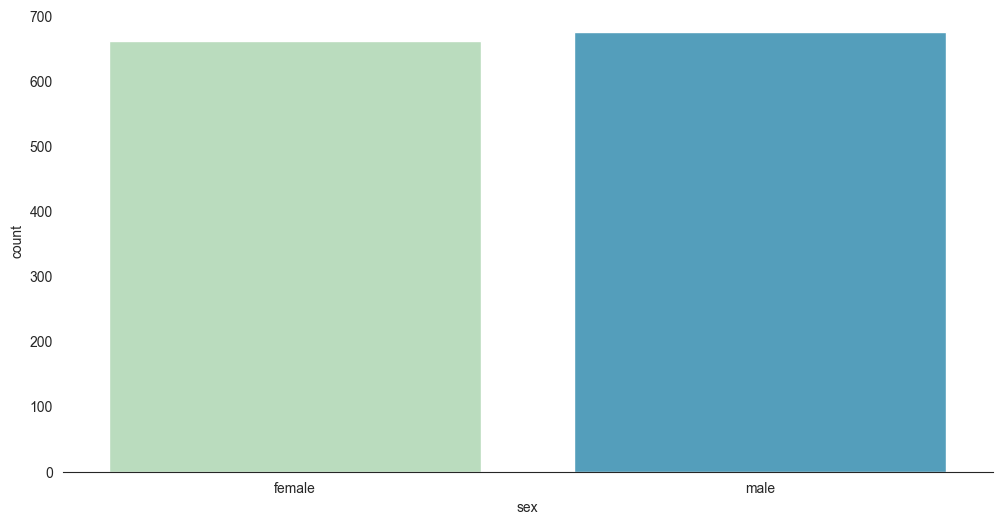

In [14]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

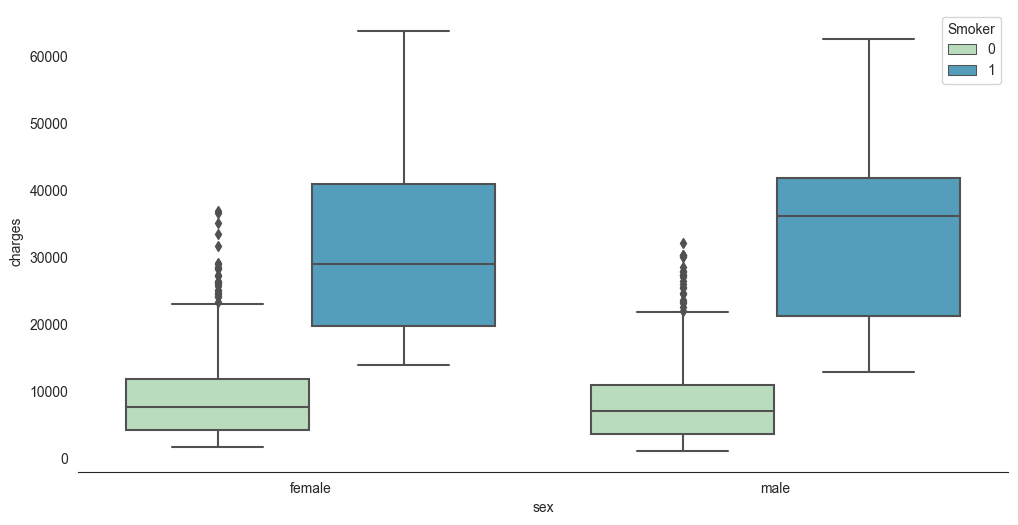

In [15]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<AxesSubplot: xlabel='age', ylabel='charges'>

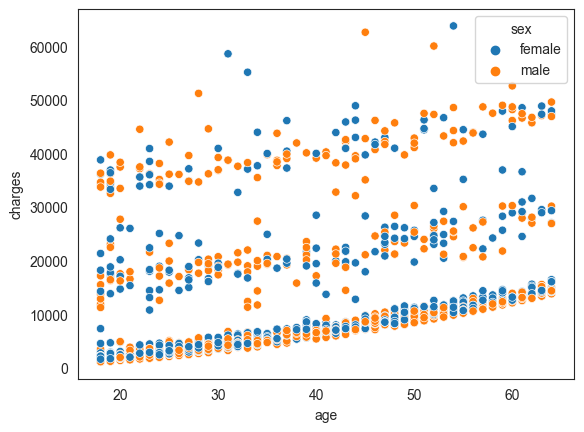

In [16]:

sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<AxesSubplot: xlabel='age', ylabel='charges'>

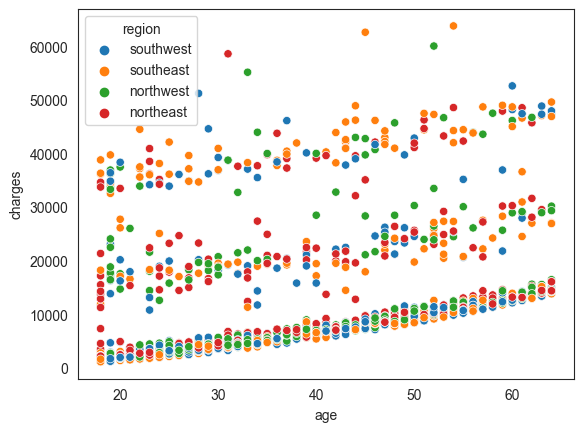

In [17]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<AxesSubplot: xlabel='age', ylabel='charges'>

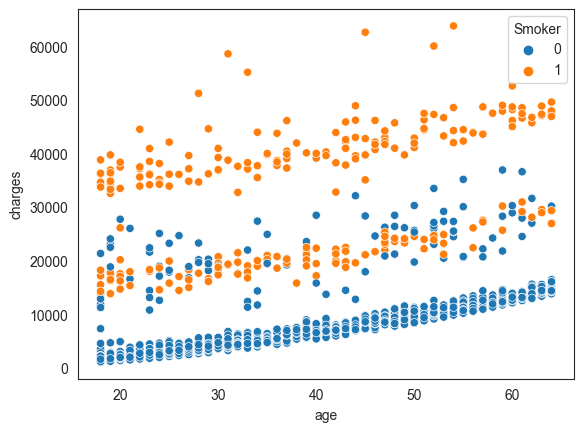

In [18]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<AxesSubplot: xlabel='bmi', ylabel='charges'>

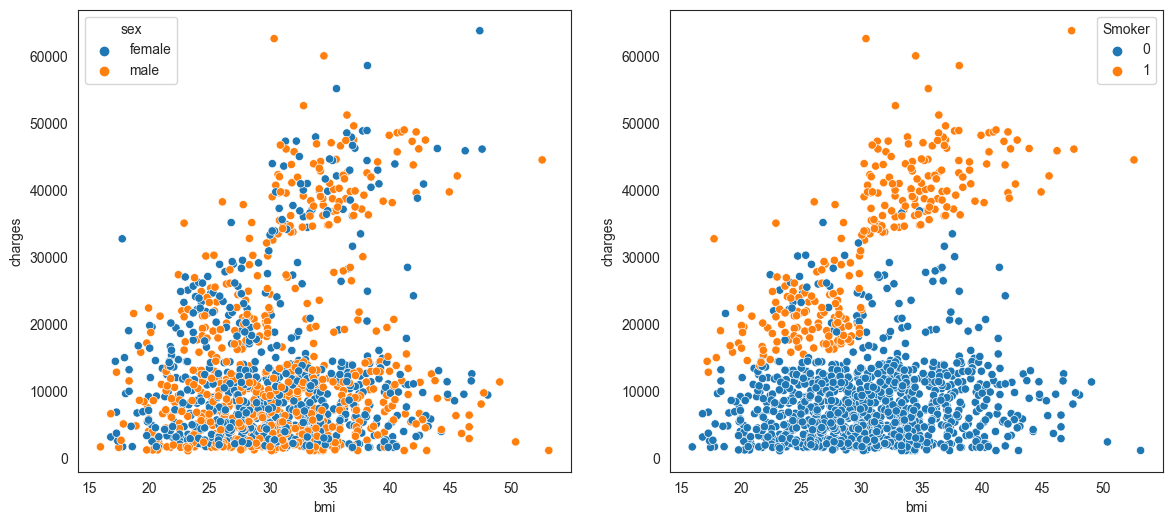

In [19]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<AxesSubplot: xlabel='bmi', ylabel='charges'>

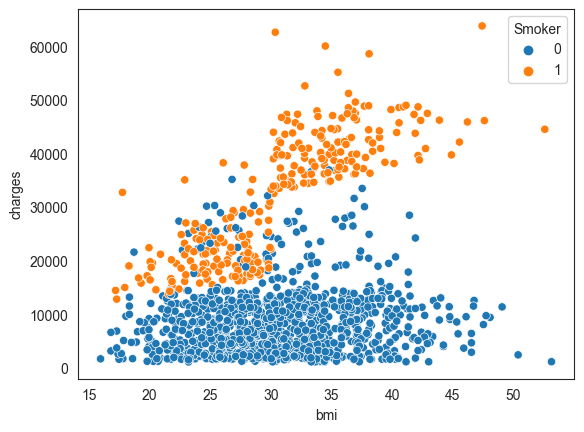

In [20]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [22]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<AxesSubplot: >

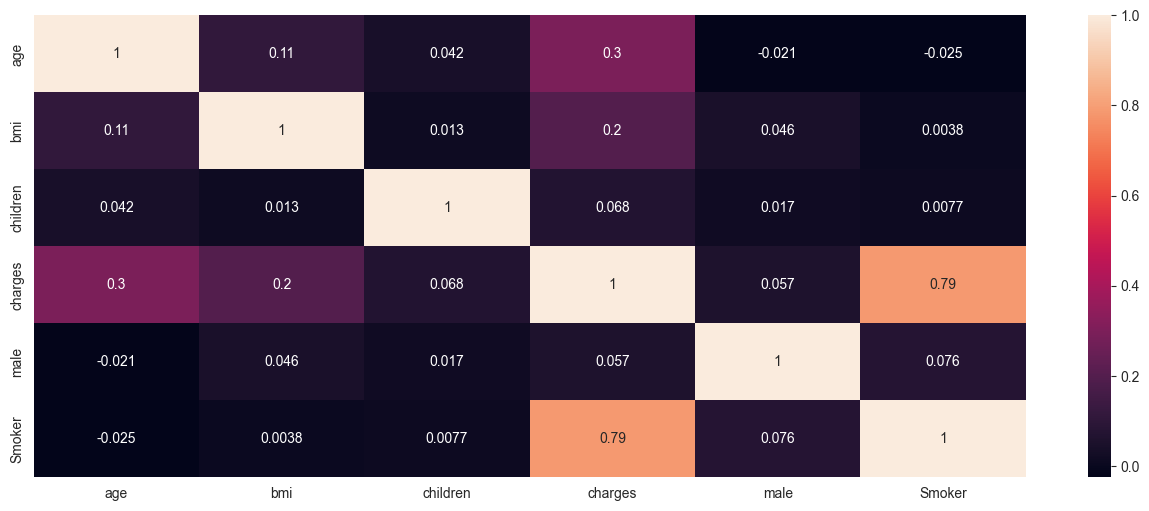

In [23]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [24]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [26]:
x_train.shape

(802, 5)

In [27]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [30]:
scaled_x_train

array([[ 0.05123048,  0.89122992, -0.91133313, -1.00249688, -0.50700423],
       [ 1.60167758, -0.02244688,  0.79834914, -1.00249688, -0.50700423],
       [ 0.8969289 ,  2.7442531 , -0.056492  ,  0.99750934, -0.50700423],
       ...,
       [-0.23066899, -0.76927138, -0.91133313, -1.00249688, -0.50700423],
       [-0.23066899, -1.36368271,  1.65319028, -1.00249688, -0.50700423],
       [ 0.54455456,  0.5262405 ,  1.65319028, -1.00249688, -0.50700423]])

# Support vector regression

In [31]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [32]:
predict

array([9339.35092165, 9478.25206668, 9319.9367658 , 9358.01742915,
       9453.92164424, 9464.45827025, 9363.14537643, 9449.11406959,
       9452.99184166, 9390.01340176, 9322.62960309, 9486.27101824,
       9451.78030088, 9433.75312019, 9368.40532247, 9334.14595335,
       9415.38657631, 9416.13031817, 9412.7770498 , 9345.96095699,
       9376.61613067, 9457.76649109, 9450.35618029, 9449.42924557,
       9470.98262726, 9331.01874149, 9433.76886198, 9419.68784329,
       9445.02064592, 9368.28289601, 9413.16698105, 9335.55423315,
       9322.845167  , 9442.72488322, 9418.90082581, 9412.86595877,
       9474.30962886, 9426.41638949, 9342.33063793, 9340.26925685,
       9441.20816585, 9398.93660334, 9424.43656849, 9357.67763257,
       9389.85911257, 9361.02814259, 9385.50746428, 9388.98555916,
       9417.535713  , 9393.12034369, 9332.87480046, 9343.66512426,
       9459.05161233, 9462.32236581, 9475.03913844, 9387.43205699,
       9339.66726992, 9361.41247755, 9471.54407849, 9352.36046

In [33]:
y_test

136      1261.44200
1096    44641.19740
910      2639.04290
836      4402.23300
130     12815.44495
           ...     
682     40103.89000
630     10085.84600
164      5028.14660
1081     4454.40265
1078    34672.14720
Name: charges, Length: 536, dtype: float64

In [34]:
np.mean((y_test - predict)**2)

157152494.1239269